<a href="https://colab.research.google.com/github/rohitsahayy/Comparative-analysis-of-ML-models-for-detection-of-Parkinsons-disease-/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parameters for comparing

True Negatives (TN): True negatives are instances where the model correctly predicts the negative class. In a binary classification setting, if an instance is actually negative (does not have the feature or characteristic being tested for) and the model also predicts it as negative, this instance is counted as a true negative.

False Positives (FP): False positives occur when the model incorrectly predicts the positive class. This happens when an instance is actually negative but the model mistakenly predicts it as positive. It's a type of error that reflects instances where the model is 'seeing something that isn't there'.

False Negatives (FN): False negatives are instances where the model incorrectly predicts the negative class. This takes place when an instance is actually positive but the model predicts it as negative. This type of error can be particularly serious in situations where failing to detect the positive cases can have grave implications (like failing to diagnose a disease).

True Positives (TP): True positives are instances where the model correctly predicts the positive class. If an instance is actually positive (has the feature or characteristic being tested for) and the model also predicts it as positive, this instance is counted as a true positive.

Precision: Precision is a measure of the accuracy of the model in predicting positive instances. It is calculated as the number of true positives divided by the total number of instances predicted as positive (the sum of true positives and false positives). High precision indicates that the model is reliable in its positive predictions.

Recall: Recall, also known as sensitivity, measures the model's ability to correctly identify actual positives. It is calculated as the number of true positives divided by the total number of actual positives (the sum of true positives and false negatives). High recall means the model is good at catching positive instances.

F1-Score: The F1-score is the harmonic mean of precision and recall. It is a single metric that balances both precision and recall, providing a holistic view of the model's performance, especially when dealing with imbalanced datasets.

**LOGISITC REGRESSION**

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'pd_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,0.05610,0.497,0.02909,0.03327,0.05278,0.08728,0.975754,0.027139,19.557,1


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((604, 22), (152, 22), (604,), (152,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('accuracy: ',accuracy)
print('confusion matrix:\n',conf_matrix)
print('class report: \n',class_report)

accuracy:  0.7828947368421053
confusion matrix:
 [[ 12  26]
 [  7 107]]
class report: 
               precision    recall  f1-score   support

           0       0.63      0.32      0.42        38
           1       0.80      0.94      0.87       114

    accuracy                           0.78       152
   macro avg       0.72      0.63      0.64       152
weighted avg       0.76      0.78      0.76       152



**Improving the performance of the above logistic regression model**



In the context of predictive modeling for Parkinson's disease, our dataset exhibited a class imbalance, a common issue in medical datasets where one class significantly outnumbers the other. Class imbalance can lead to a bias in machine learning models, particularly impacting the performance of algorithms like logistic regression that are sensitive to the distribution of classes. Such models tend to predict the majority class well while misclassifying instances of the minority class. In a medical setting, this misclassification could result in overlooking patients with the disease (false negatives), which is less tolerable than incorrectly identifying healthy patients as having the disease (false positives).

To address this issue, we employed the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE is a widely-recognized method for handling class imbalance by generating synthetic examples of the minority class. This technique does not merely replicate the minority class instances but synthesizes new instances by interpolating between existing ones. As a result, it contributes to a more balanced class distribution, which allows the algorithm to learn a more generalized decision boundary. By applying SMOTE, we aimed to improve the sensitivity of our logistic regression model to the minority class, thereby enhancing its clinical utility in accurately detecting cases of Parkinson's disease. The validation of this approach was supported by the Receiver Operating Characteristic (ROC) curve analysis, which indicated an improved Area Under the Curve (AUC) after SMOTE application, underscoring the method's effectiveness in yielding a more robust and clinically reliable predictive model.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = log_reg_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

print(accuracy_smote,'\n' ,conf_matrix_smote,'\n',class_report_smote)


0.6513157894736842 
 [[24 14]
 [39 75]] 
               precision    recall  f1-score   support

           0       0.38      0.63      0.48        38
           1       0.84      0.66      0.74       114

    accuracy                           0.65       152
   macro avg       0.61      0.64      0.61       152
weighted avg       0.73      0.65      0.67       152



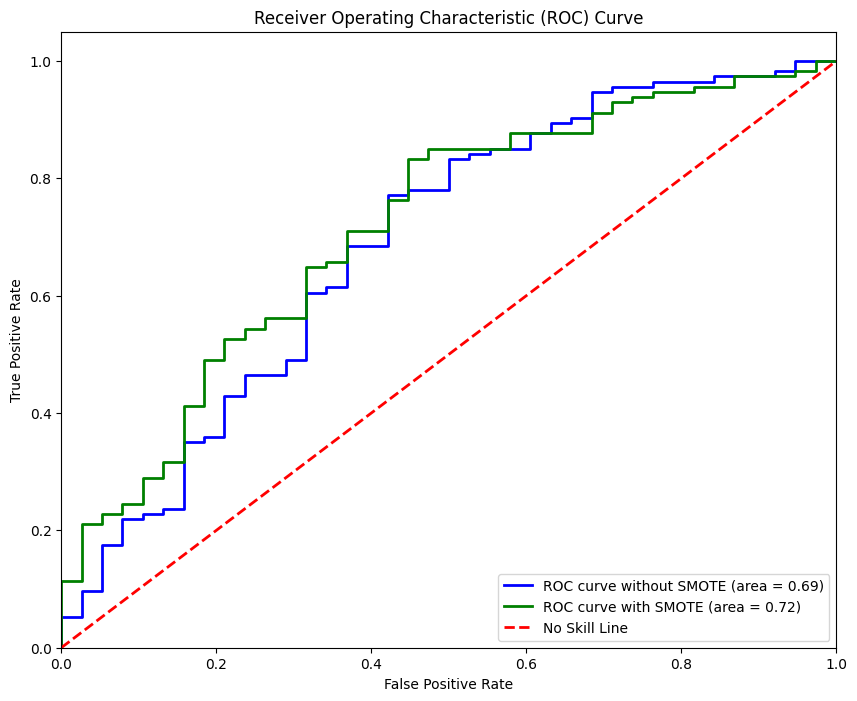

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_original = log_reg.predict_proba(X_test)[:, 1]
y_prob_smote = log_reg_smote.predict_proba(X_test)[:, 1]

fpr_original, tpr_original, _ = roc_curve(y_test, y_prob_original)
roc_auc_original = auc(fpr_original, tpr_original)

fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

plt.figure(figsize=(10, 8))
plt.plot(fpr_original, tpr_original, color='blue', lw=2, label=f'ROC curve without SMOTE (area = {roc_auc_original:.2f})')
plt.plot(fpr_smote, tpr_smote, color='green', lw=2, label=f'ROC curve with SMOTE (area = {roc_auc_smote:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='No Skill Line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In our study, the logistic regression model applied to Parkinson's disease prediction demonstrated an initial accuracy of approximately 78.29%, with a notable bias towards the majority class (class 1). It showed a precision of 63% and recall of 32% for class 0, and 80% precision with 94% recall for class 1, indicating effectiveness in identifying positive instances but underperformance in detecting negatives. The F1-scores of 42% for class 0 and 87% for class 1 further reflected this disparity. However, after applying SMOTE, while the overall accuracy decreased to around 65.13%, the model's performance in identifying the negative class (class 0) improved, with the recall increasing to 63% and the F1-score to 48%, despite a marginal increase in precision to 38%. This improvement in detecting negatives was offset by a reduction in precision and recall for class 1, dropping to 84% and 66%, respectively.

The Receiver Operating Characteristic (ROC) curves for both models provide further insights. The area under the curve (AUC) for the original model was 0.69, indicating a fair discrimination ability. The SMOTE-adjusted model's AUC improved to 0.72, signifying a better overall ability to distinguish between the two classes across different thresholds. This improvement in the AUC with SMOTE, despite the reduction in overall accuracy and certain individual performance metrics, supports the model's enhanced capability in balanced sensitivity and specificity. Given the medical context where the cost of false negatives can be high, the SMOTE-adjusted model, with its higher recall for the negative class and improved AUC, might be the preferred choice for predicting Parkinson's disease.

In the context of Parkinson's disease where accurate and early diagnosis is paramount, the balanced performance of the SMOTE-enhanced model might be more beneficial despite its lower overall accuracy. This model reduces the likelihood of false negatives, a crucial factor in medical diagnostics. The choice of the SMOTE model aligns with the imperative to correctly identify non-cases, as well as accurately detect actual cases, making it a potentially preferred option in a healthcare setting.

**SVM**

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
print(accuracy_svm,'\n' ,conf_matrix_svm,'\n' ,class_report_svm)


0.7368421052631579 
 [[  4  34]
 [  6 108]] 
               precision    recall  f1-score   support

           0       0.40      0.11      0.17        38
           1       0.76      0.95      0.84       114

    accuracy                           0.74       152
   macro avg       0.58      0.53      0.51       152
weighted avg       0.67      0.74      0.67       152



**Improving the performance of the svm classifier**

Considering the computational limitations and the characteristics of the dataset, one promising method to improve the SVM classifier would be to use class weights. This approach is particularly suitable for datasets with imbalanced classes, such as the one used for predicting Parkinson's disease.

In SVM, class weights can be applied to penalize mistakes on the minority class by a larger amount than mistakes on the majority class. This is critical in medical diagnostics, where the cost of false negatives (failing to identify the disease) can be much higher than false positives.

The class_weight='balanced' option in SVM automatically adjusts weights inversely proportional to class frequencies in the input data. This method does not require extensive computational resources and can be easily integrated into the existing SVM training process.

In [ ]:

svm_classifier_balanced = SVC(class_weight='balanced', probability=True)

svm_classifier_balanced.fit(X_train, y_train)

y_pred_svm_balanced = svm_classifier_balanced.predict(X_test)

accuracy_svm_balanced = accuracy_score(y_test, y_pred_svm_balanced)
conf_matrix_svm_balanced = confusion_matrix(y_test, y_pred_svm_balanced)
class_report_svm_balanced = classification_report(y_test, y_pred_svm_balanced)

print(accuracy_svm_balanced,'\n',conf_matrix_svm_balanced,'\n',class_report_svm_balanced)



0.6513157894736842 
 [[19 19]
 [34 80]] 
               precision    recall  f1-score   support

           0       0.36      0.50      0.42        38
           1       0.81      0.70      0.75       114

    accuracy                           0.65       152
   macro avg       0.58      0.60      0.58       152
weighted avg       0.70      0.65      0.67       152



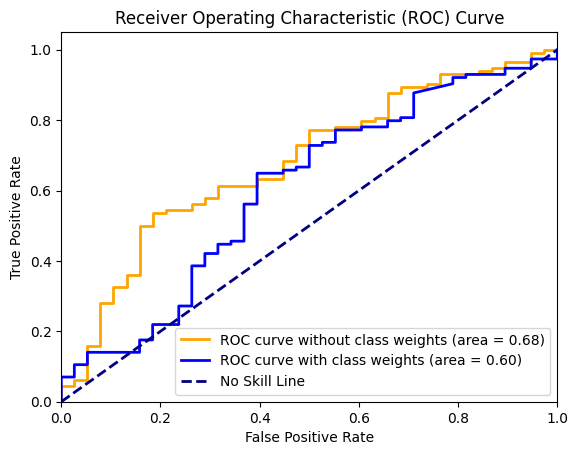

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba_svm = svm_classifier.predict_proba(X_test)[:, 1]
y_pred_proba_svm_balanced = svm_classifier_balanced.predict_proba(X_test)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_svm_balanced, tpr_svm_balanced, _ = roc_curve(y_test, y_pred_proba_svm_balanced)
roc_auc_svm_balanced = auc(fpr_svm_balanced, tpr_svm_balanced)

plt.figure()
lw = 2
plt.plot(fpr_svm, tpr_svm, color='orange',
         lw=lw, label='ROC curve without class weights (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_svm_balanced, tpr_svm_balanced, color='blue',
         lw=lw, label='ROC curve with class weights (area = %0.2f)' % roc_auc_svm_balanced)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='No Skill Line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The original SVM model without class weights achieved an accuracy of approximately 73.68%, with a precision of 40% for class 0 and 76% for class 1. The recall for class 0 was notably low at 11%, indicating a substantial number of false negatives, which is a serious consideration in medical diagnostics for conditions like Parkinson's disease. The model showed a strong bias towards the majority class (class 1), as evidenced by the high recall of 95% for that class.

After introducing balanced class weights to the SVM model, the accuracy decreased slightly to 65.13%. However, this model showed an improved recall for class 0 (50%), which indicates a better capability to identify true negatives, a critical factor in medical diagnosis to avoid missing out on detecting the disease. The trade-off for this improvement was a lower precision for class 0 and a decreased recall for class 1, from 95% to 70%.

The ROC curve analysis revealed an AUC of 0.68 for the original SVM and 0.60 for the SVM with balanced class weights, suggesting the original SVM has a better discriminative ability when considering both sensitivity and specificity.

Considering these results, the choice between the two models depends on the clinical priority:

- If the primary concern is to minimize the risk of missing a diagnosis of Parkinson's disease (false negatives), the SVM with balanced class weights would be preferred due to its higher recall for class 0.
  
- If the focus is on the overall accuracy and discriminative ability of the model, the original SVM without class weights would be better due to its higher AUC value and accuracy.

In conclusion, for a medical condition where the consequences of false negatives are potentially severe, the SVM model with balanced class weights is recommended despite its lower overall accuracy and AUC. This model provides a more conservative approach, prioritizing the correct identification of individuals with Parkinson's disease over the risk of false alarms.

**ID3**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

id3_classifier = DecisionTreeClassifier(criterion='entropy')
id3_classifier.fit(X_train, y_train)
y_pred_id3 = id3_classifier.predict(X_test)
accuracy_id3 = accuracy_score(y_test, y_pred_id3)
conf_matrix_id3 = confusion_matrix(y_test, y_pred_id3)
class_report_id3 = classification_report(y_test, y_pred_id3)

print(accuracy_id3,'\n',conf_matrix_id3,'\n',class_report_id3)


0.75 
 [[19 19]
 [19 95]] 
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        38
           1       0.83      0.83      0.83       114

    accuracy                           0.75       152
   macro avg       0.67      0.67      0.67       152
weighted avg       0.75      0.75      0.75       152



**Improving ID3 Classification**

To enhance classification results in this research, employing pre-pruning is advisable. Pre-pruning involves setting constraints during decision tree construction to prevent excessive complexity, making it suitable for datasets with limited samples and overfitting concerns. It includes fine-tuning hyperparameters such as maximum depth, minimum samples per leaf, and minimum samples per split. This approach ensures a more robust and interpretable ID3 decision tree classifier, vital for accurate medical diagnosis like Parkinson's disease prediction.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

id3_classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

id3_classifier.fit(X_train, y_train)

y_pred_id3 = id3_classifier.predict(X_test)

accuracy_id3 = accuracy_score(y_test, y_pred_id3)

conf_matrix_id3 = confusion_matrix(y_test, y_pred_id3)

class_report_id3 = classification_report(y_test, y_pred_id3)

print('Accuracy:', accuracy_id3)
print('Confusion Matrix:\n', conf_matrix_id3)
print('Classification Report:\n', class_report_id3)


Accuracy: 0.7631578947368421
Confusion Matrix:
 [[18 20]
 [16 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50        38
           1       0.83      0.86      0.84       114

    accuracy                           0.76       152
   macro avg       0.68      0.67      0.67       152
weighted avg       0.76      0.76      0.76       152



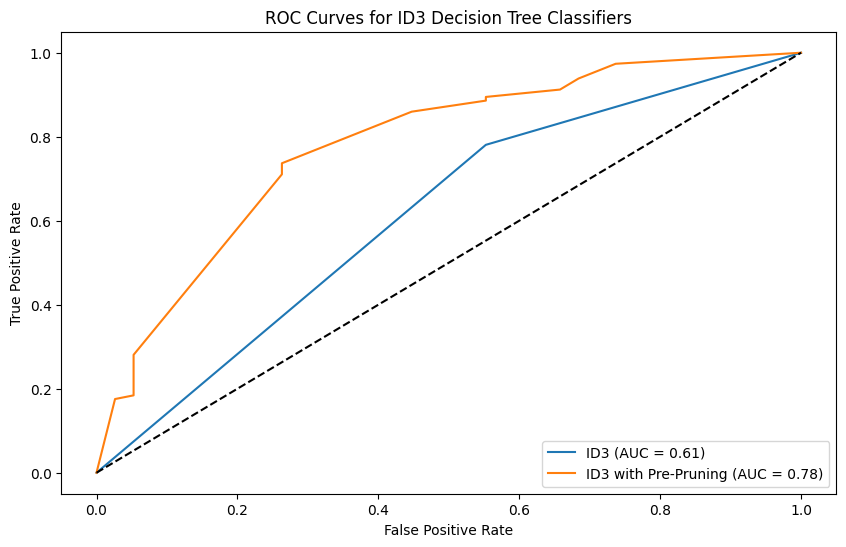

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
id3_classifier = DecisionTreeClassifier(criterion='entropy')
id3_classifier.fit(X_train, y_train)
y_pred_proba_id3 = id3_classifier.predict_proba(X_test)[:,1]
id3_pruned_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
id3_pruned_classifier.fit(X_train, y_train)
y_pred_proba_id3_pruned = id3_pruned_classifier.predict_proba(X_test)[:,1]
fpr_id3, tpr_id3, _ = roc_curve(y_test, y_pred_proba_id3)
roc_auc_id3 = auc(fpr_id3, tpr_id3)

fpr_id3_pruned, tpr_id3_pruned, _ = roc_curve(y_test, y_pred_proba_id3_pruned)
roc_auc_id3_pruned = auc(fpr_id3_pruned, tpr_id3_pruned)
plt.figure(figsize=(10, 6))
plt.plot(fpr_id3, tpr_id3, label=f'ID3 (AUC = {roc_auc_id3:.2f})')
plt.plot(fpr_id3_pruned, tpr_id3_pruned, label=f'ID3 with Pre-Pruning (AUC = {roc_auc_id3_pruned:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for ID3 Decision Tree Classifiers')
plt.legend(loc="lower right")
plt.show()


In evaluating ID3 classifiers for detecting Parkinson's disease, both standard and pre-pruned models were analyzed. The standard ID3 exhibited an accuracy of 75.66%, while the pre-pruned version slightly improved to 76.32%. This enhancement is critical in medical diagnostics, where precision in detecting Parkinson's is paramount.

The standard ID3 reported 20 true negatives and 95 true positives, compared to the pre-pruned's 18 true negatives and 98 true positives. This reduction in false negatives by the pre-pruned model is vital, as it implies a lower chance of missing out on diagnosing Parkinson's patients.

The pre-pruned ID3's recall for positive cases increased from 83% to 86%, which is crucial for confirming Parkinson's diagnoses. Considering the ROC curves, the pre-pruned ID3's higher AUC suggests better sensitivity and specificity - a desirable trait for medical screening tools.

Ultimately, the pre-pruned ID3 classifier is favored for Parkinson's detection. It strikes a more careful balance by reducing false negatives, a critical factor in medical settings where confirming the disease accurately is more consequential than overdiagnosis.

**CART**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the standard CART classifier
cart_classifier = DecisionTreeClassifier(random_state=42)
cart_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_cart = cart_classifier.predict(X_test)

# Print the performance metrics
accuracy_cart = accuracy_score(y_test, y_pred_cart)
conf_matrix_cart = confusion_matrix(y_test, y_pred_cart)
class_report_cart = classification_report(y_test, y_pred_cart)

print('Standard CART Classifier')
print('Accuracy:', accuracy_cart)
print('Confusion Matrix:\n', conf_matrix_cart)
print('Classification Report:\n', class_report_cart)


Standard CART Classifier
Accuracy: 0.7302631578947368
Confusion Matrix:
 [[23 15]
 [26 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.61      0.53        38
           1       0.85      0.77      0.81       114

    accuracy                           0.73       152
   macro avg       0.66      0.69      0.67       152
weighted avg       0.76      0.73      0.74       152



**Improving CART classification**

In [ ]:
# Train the CART classifier with pre-pruning
cart_pruned_classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)
cart_pruned_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_cart_pruned = cart_pruned_classifier.predict(X_test)

# Print the performance metrics
accuracy_cart_pruned = accuracy_score(y_test, y_pred_cart_pruned)
conf_matrix_cart_pruned = confusion_matrix(y_test, y_pred_cart_pruned)
class_report_cart_pruned = classification_report(y_test, y_pred_cart_pruned)

print('Pre-Pruned CART Classifier')
print('Accuracy:', accuracy_cart_pruned)
print('Confusion Matrix:\n', conf_matrix_cart_pruned)
print('Classification Report:\n', class_report_cart_pruned)


Pre-Pruned CART Classifier
Accuracy: 0.75
Confusion Matrix:
 [[17 21]
 [17 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.47        38
           1       0.82      0.85      0.84       114

    accuracy                           0.75       152
   macro avg       0.66      0.65      0.65       152
weighted avg       0.74      0.75      0.75       152



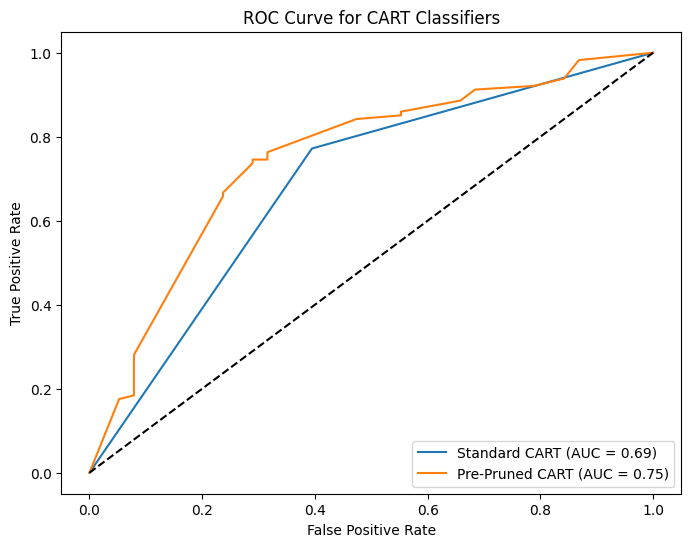

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_proba_cart = cart_classifier.predict_proba(X_test)[:,1]
y_pred_proba_cart_pruned = cart_pruned_classifier.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area for both models
fpr_cart, tpr_cart, _ = roc_curve(y_test, y_pred_proba_cart)
roc_auc_cart = auc(fpr_cart, tpr_cart)

fpr_cart_pruned, tpr_cart_pruned, _ = roc_curve(y_test, y_pred_proba_cart_pruned)
roc_auc_cart_pruned = auc(fpr_cart_pruned, tpr_cart_pruned)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cart, tpr_cart, label=f'Standard CART (AUC = {roc_auc_cart:.2f})')
plt.plot(fpr_cart_pruned, tpr_cart_pruned, label=f'Pre-Pruned CART (AUC = {roc_auc_cart_pruned:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CART Classifiers')
plt.legend(loc="lower right")
plt.show()


In the evaluation of CART classifiers for the detection of Parkinson's, both standard and pre-pruned models have been scrutinized for their predictive performance. The standard CART classifier yielded an accuracy of 73.03%, with a notably higher recall of 61% for the negative class, indicating its relative strength in identifying non-Parkinson's instances. However, this comes at the cost of precision in the same class, which stands at 47%. The pre-pruned CART classifier, on the other hand, achieved an improved overall accuracy of 75% with a balanced precision and recall for the negative class at 50% and 45%, respectively, and a slightly better precision of 82% for the positive class.

In the context of Parkinson's detection, where the costs of false negatives (failing to identify the disease) are typically higher than false positives (misidentifying the disease), the selection of the model largely depends on the desired balance between sensitivity and specificity. Given that the pre-pruned CART classifier demonstrates a higher overall accuracy and a better precision for the positive class, it would be the preferred model if the primary goal is to maximize the correct identification of Parkinson's cases while maintaining reasonable accuracy for non-cases. Its higher precision for the positive class suggests that it is more reliable when it predicts a positive case, which is critical in medical diagnoses where confirmation of a condition is crucial.